In [426]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [427]:
path_df = "/home/taiel/Documentos/FIUBA/2024_C1/OrgaDeDatos/7506R-1C2024-GRUPO01/TP1/properati_argentina_2021.csv"

In [428]:
df = pd.read_csv(path_df)

In [429]:
df.shape

(460154, 20)

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [431]:
df.head(3)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay


In [432]:
df.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64

Veo que en place_l6 literalmente **todas** las filas tienen valor NaN

In [433]:
df = df.drop("place_l6", axis=1)

Me fijo si todas las propiedades del dataset corresponden a casas en venta

In [434]:
df["operation"].value_counts()

operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64

Aquellos valores que no son de venta deberia descartarlos ? (yo creeria que si)

In [435]:
df = df[~df["operation"].isin(["Alquiler", "Alquiler temporal"])]

In [436]:
df.shape

(337874, 19)

In [437]:
df[df["property_price"] <= 0].shape

(460, 19)

In [438]:
df = df[df["property_price"] > 0]

In [439]:
df.shape

(323821, 19)

In [440]:
df.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      27814
longitud                     27814
place_l2                         0
place_l3                     14058
place_l4                    224389
place_l5                    322385
operation                        0
property_type                    0
property_rooms               60795
property_bedrooms            74707
property_surface_total       38372
property_surface_covered     22431
property_price                   0
property_currency                0
property_title                   0
dtype: int64

In [441]:
df[df["property_rooms"].isnull() & df["property_bedrooms"].isnull()].shape[0]

44282

In [442]:
df[df["property_rooms"].isnull() & ~df["property_bedrooms"].isnull()].shape[0]

16513

In [443]:
df[df["property_bedrooms"].isnull() & ~df["property_rooms"].isnull()].shape[0]

30425

In [444]:
df["property_rooms"].fillna(df["property_bedrooms"], inplace=True)
df["property_bedrooms"].fillna(df["property_rooms"], inplace=True)

In [445]:
df[df["property_surface_total"].isnull() & df["property_surface_covered"].isnull()].shape[0]

0

In [446]:
df[df["property_surface_total"].isnull() & ~df["property_surface_covered"].isnull()].shape[0]

38372

In [447]:
df[df["property_surface_covered"].isnull() & ~df["property_surface_total"].isnull()].shape[0]

22431

In [448]:
df["property_surface_total"].fillna(df["property_surface_covered"], inplace=True)
df["property_surface_covered"].fillna(df["property_surface_total"], inplace=True)

In [449]:
df.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      27814
longitud                     27814
place_l2                         0
place_l3                     14058
place_l4                    224389
place_l5                    322385
operation                        0
property_type                    0
property_rooms               44282
property_bedrooms            44282
property_surface_total           0
property_surface_covered         0
property_price                   0
property_currency                0
property_title                   0
dtype: int64

In [450]:
#seaborn.heatmap(df.corr(), annot = True)

## Visualizaciones

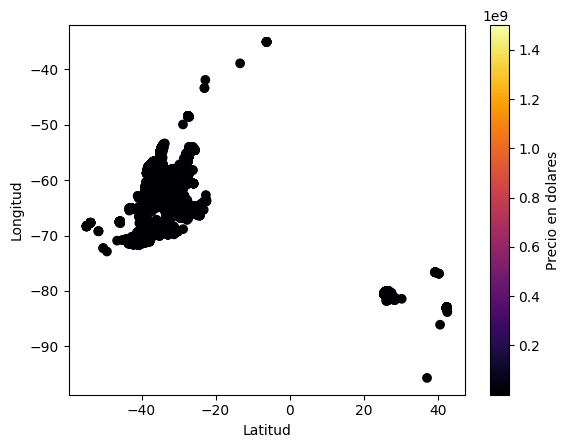

In [451]:
plt.scatter(df["latitud"], df["longitud"], c = df["property_price"], cmap="inferno")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.colorbar(label="Precio en dolares")

#cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{np.exp(x):.0f}"))
plt.show()